In [0]:
from google.colab import drive
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
import numpy as np
from gensim.models import Word2Vec
import tensorflow as tf

Using TensorFlow backend.


*Labeling  the statements as  neutral(0), positive(1) and negative(2) *

---



---



In [0]:
drive.mount('/content/gdrive')

file = open('/content/gdrive/My Drive/latest/comments.txt',"r") #comments of  delhi video tours  especially food related
comments= file.read().splitlines()  
print(len(comments),"of comments in the given dataset")
file.close()

# filename = '/content/gdrive/My Drive/latest/negative.txt'
# file = open(filename,"r" )
# negative = file.read().splitlines()
# file.close()   

# filename = '/content/gdrive/My Drive/latest/positive.txt'
# file = open(filename,"r" )
# positive = file.read().splitlines()
# file.close()

# lab=[]
# for i in range(len(comments)):
#     lab.append(0)
# def label(comments,negative,positive):
#     for i in range(len(comments)):
#         words=comments[i].split()
#         for j in range(len(words)):
#             for k in range(len(positive)):
#                 if(words[j]==positive[k]):
#                     lab[i]=.7
                
#             for l in range(len(negative)): 
#                 if(words[j]==negative[l]):
#                     lab[i]=.5
                
           
# label(comments,negative,positive)
# np.save('/content/gdrive/My Drive/latest/labelf.npy', lab)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
30080 of comments in the given dataset


*Vocabulary building section *

---



---



In [0]:
print(comments[1])

you should try coming to Tunisia 


In [0]:
import string
with open('/content/gdrive/My Drive/latest/commentss.txt', 'w') as f:
    for item in comments:
      words=" ".join("".join([" " if ch in string.punctuation else ch for ch in item]).split())
      wordsf="".join(str(x) for x in list(words))
      f.write("%s\n" % wordsf)
file.close()
file = open('/content/gdrive/My Drive/latest/commentss.txt',"r") #comments of  delhi video tours  especially food related
commentss= file.read().splitlines()  
print(len(comments),"of comments in the given dataset")
file.close()
a=[]
for c in string.punctuation:
    a.append(c)
with open('/content/gdrive/My Drive/latest/commentssss.txt', 'w') as f:
    for item in commentss:
      words=(set(item.split()).difference(a))
      wordsf=" ".join(str(x.lower()) for x in list(words))
      f.write("%s\n" % wordsf)
file.close()

30080 of comments in the given dataset


*Removing larger sentences and retaining only ones with the length specified or lesser ones*

---



---



In [0]:
j=[]
sentencesf=[]         #calculating the length of all sentences ie the no. of words
labelf=[]
filename = '/content/gdrive/My Drive/latest/commentssss.txt'
file = open(filename,"r" )
sentences = file.read().splitlines()
file.close() 
lab=np.load('/content/gdrive/My Drive/latest/labelf.npy')
for i in range(len(sentences)):
  j.append(len(sentences[i]))

In [0]:
sense=[]
for i in range(len(sentences)):
    sense.append(0)
for i in range(0,len(sentences)):
    sense[i]=sentences[i].split()
    
sentencesf=[]
labelf=[]
j=[]
for i in range(len(sentences)):
  j.append(len(sense[i]))


for i in range(len(j)):
  if(j[i]<=68):
    sentencesf.append(sense[i])
    labelf.append(lab[i])
print(type(sentencesf))


<class 'list'>



*Word2Vec*

---



---



In [0]:
model = Word2Vec(sentencesf,size=68, min_count=5)#word vector dim=28
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
# print(model[ 'was' ])
# save model



Word2Vec(vocab=4758, size=68, alpha=0.025)
['ve', 'best', 'brain', 'had', 'that', 'the', 'ever', 'i', 'was', 'coming', 'to', 'try', 'you', 'should', 'pakistan', 'u', 'will', 'when', 'come', 'nice', 'by', 'english', 'wala', 'is', 'biryani', 'sad', 'didn', 'this', 'so', 't', 'test', 'why', 'india', 'video', 'in', 'all', 'sellers', 'are', 'of', 'men', 'one', 'seen', 'fit', 'go', 'like', 'reviews', 'how', 'wherever', 'have', 'fooled', '500rs', 'stuffed', 'they', 'land', 'king', 'food', 'unhygenic', 'bangladesh', 'comes', 'please', 'me', 'subscribe', 'superb', 'much', 'too', 'ass', 'burn', 'spicy', 'for', 'just', 'indian', 'spices', 'foods', 'would', 'do', 'a', 'street', 'trip', 'el', 'gaali', 'wali', 'paratha', 'from', 'am', 'and', 'love', 'we', 'also', 'taste', 'watching', 'live', 'pigs', 'indians', 'welcome', 'different', 'other', 'hope', 'east', 'it', 'north', 's', 'totally', 'visit', 'cities', 'll', 'fry', 'think', 'deep', 'don', 'parantha', 'want', 'very', 'pak', 'program', 'cool', 't

*Padding for MLP*

---



---



In [0]:
zerovector=[]
for i in range(68):
  zerovector.append(0)
# print(label)
def sentencevector(sent):
  vector=[]
  for word in sent:
    if(word  in words):
       vector.append(model[word])
    else:
      vector.append(zerovector)
  if(len(sent)<68):
    for i in range(len(sent),68):
      vector.append(zerovector)
  return(vector)



*Splitting into training and test data*

---



---



In [0]:
Xtotal=[]
Ytotal=labelf
for i in range(len(sentencesf)):
  a=np.array(sentencevector(sentencesf[i]))
  Xtotal.append(a)

Xtrain=np.array(Xtotal[:20000])
Xtest=np.array(Xtotal[20000:27263])
Y_train=np.array(Ytotal[:20000])
Y_test=np.array(Ytotal[20000:27263])
X_train = Xtrain.reshape(Xtrain.shape[0], 68, 68 , 1).astype('float32')
X_test=Xtest.reshape(Xtest.shape[0], 68, 68 , 1).astype('float32')




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


*Model construction*

---



---



In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(700, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=1)
model.evaluate(X_test, Y_test)


Epoch 1/1
7263/7263 [==============================] - 2s 266us/step


[1.4859545366392943e-05, 0.5361420899920928]

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  323750    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  7100      
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  303       
Total params: 331,153
Trainable params: 331,153
Non-trainable params: 0
_________________________________________________________________


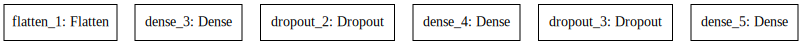

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

